# Exploratory Data Analysis of Chatbot Interaction Data

## Dataset Overview

In [2]:

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../data/cleaned_data.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()
        

,id,stage,accuracy,completeness,innovation,difficulty,n_user_messages,n_internet_resources,time_to_complete_sec,cohort,assignment,llm_experience
0,0,ideation,7,2,1,6.0,0.0,23.0,2075.0,expert,llm_internet,Used a few times
1,0,acquisition,8,6,0,4.0,0.0,22.0,3175.0,expert,llm_internet,Used a few times
2,0,magnification,4,3,0,6.0,0.0,17.0,2158.0,expert,llm_internet,Used a few times
3,0,formulation,3,2,0,2.0,0.0,5.0,1151.0,expert,llm_internet,Used a few times
4,0,release,6,2,0,5.0,0.0,23.0,1816.0,expert,llm_internet,Used a few times


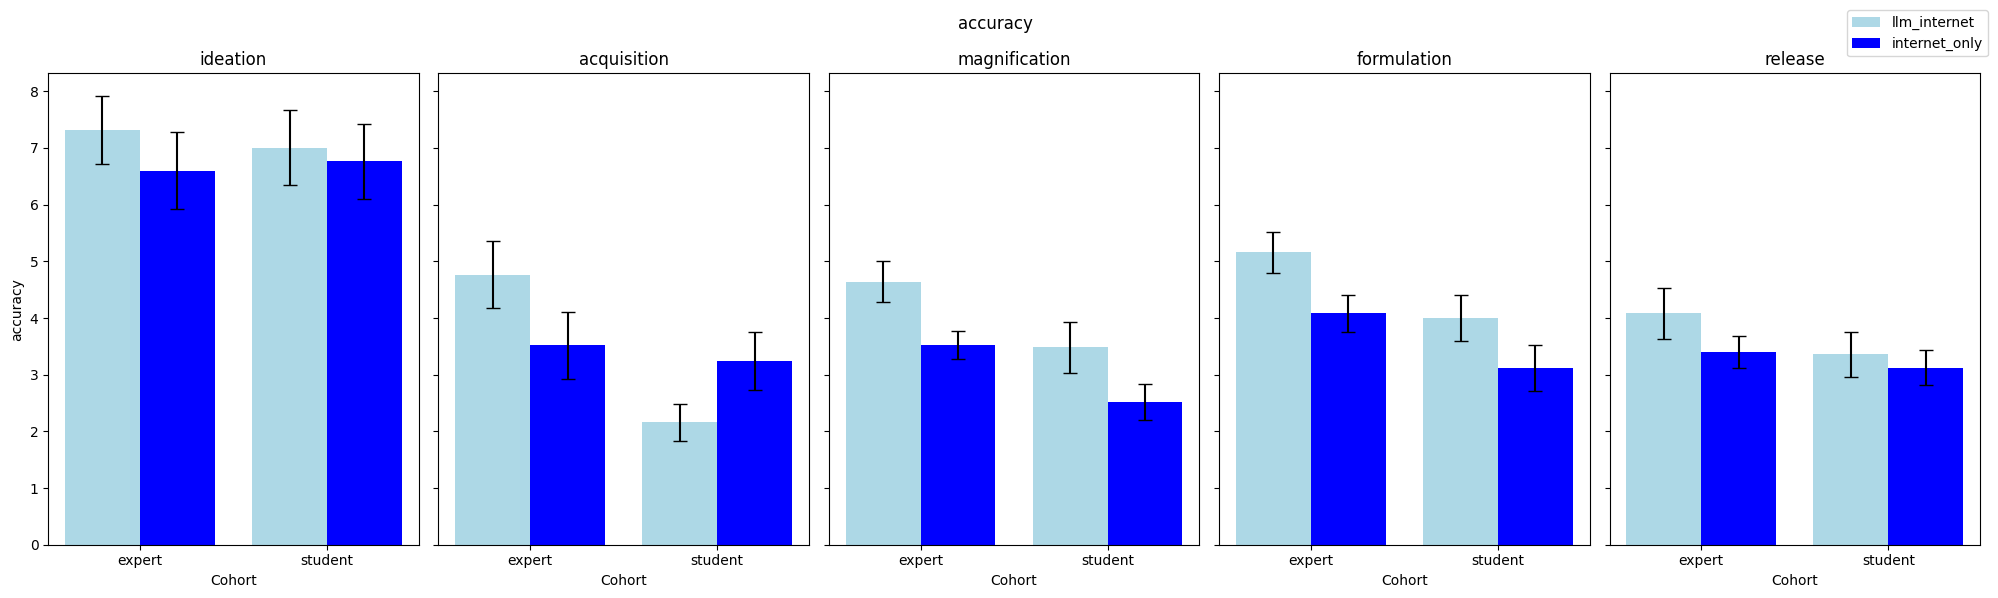

In [3]:
import matplotlib.pyplot as plt

# Unique identifiers for each category
data = df.copy()
stages = data['stage'].unique()
cohorts = data['cohort'].unique()
assignments = data['assignment'].unique()
metric = 'accuracy'

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, len(stages), figsize=(20, 6), sharey=True)

# Colors for the assignments
colors = ['lightblue', 'blue']

# Create the plots for each stage, including error bars for standard deviation
for i, stage in enumerate(stages):
    ax = axes[i]
    
    # Data for this stage
    stage_data = data[data['stage'] == stage]
    
    # Variables to track the position of bars for each cohort
    cohort_positions = np.arange(len(cohorts))
    
    # Plot data for each cohort and assignment
    for j, cohort in enumerate(cohorts):
        for k, assignment in enumerate(assignments):
            # Filter data for this combination of stage, cohort, and assignment
            subset = stage_data[(stage_data['cohort'] == cohort) & (stage_data['assignment'] == assignment)]
            # Mean accuracy for this cohort and assignment at the current stage
            mean_accuracy = subset[metric].mean()
            std_error = subset['accuracy'].std() / np.sqrt(len(subset))  # Standard error
            # Determine position for the bar
            bar_position = cohort_positions[j] - 0.2 + k * 0.4
            # Plot the bar
            ax.bar(bar_position, mean_accuracy, yerr=std_error, capsize=5, width=0.4, color=colors[k], label=f'{assignment}' if (i == j == 0) else "")
    
    # Set the labels and titles
    ax.set_xticks(cohort_positions)
    ax.set_xticklabels(cohorts)
    ax.set_title(stage)
    ax.set_xlabel('Cohort')
    if i == 0:
        ax.set_ylabel(metric)

# Add a legend outside the last subplot
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1, 1))
fig.suptitle(metric)

plt.tight_layout()
plt.show()


## Descriptive Statistics and Correlation Analysis

In [2]:

# Descriptive statistics for numerical columns
descriptive_stats = df.describe()

# Correlation matrix to understand relationships between numerical variables
correlation_matrix = df.corr()

descriptive_stats, correlation_matrix
        

(               id    accuracy  completeness  innovation  difficulty  \
 count  500.000000  500.000000     500.00000  500.000000  495.000000   
 mean    49.500000    4.292000       3.16600    0.736000    4.614141   
 std     28.894979    2.737467       2.11646    1.164911    2.620884   
 min      0.000000    0.000000       0.00000    0.000000    1.000000   
 25%     24.750000    2.000000       2.00000    0.000000    2.500000   
 50%     49.500000    4.000000       3.00000    0.000000    4.000000   
 75%     74.250000    6.000000       4.00000    1.000000    7.000000   
 max     99.000000   10.000000      10.00000   10.000000   10.000000   
 
        n_user_messages  n_internet_resources  time_to_complete_sec  
 count       497.000000            497.000000            497.000000  
 mean          3.661972             13.800805           2190.128773  
 std           6.425631             13.068004           1280.344025  
 min           0.000000              0.000000             43.000000  


## Distribution Analysis and Visualization

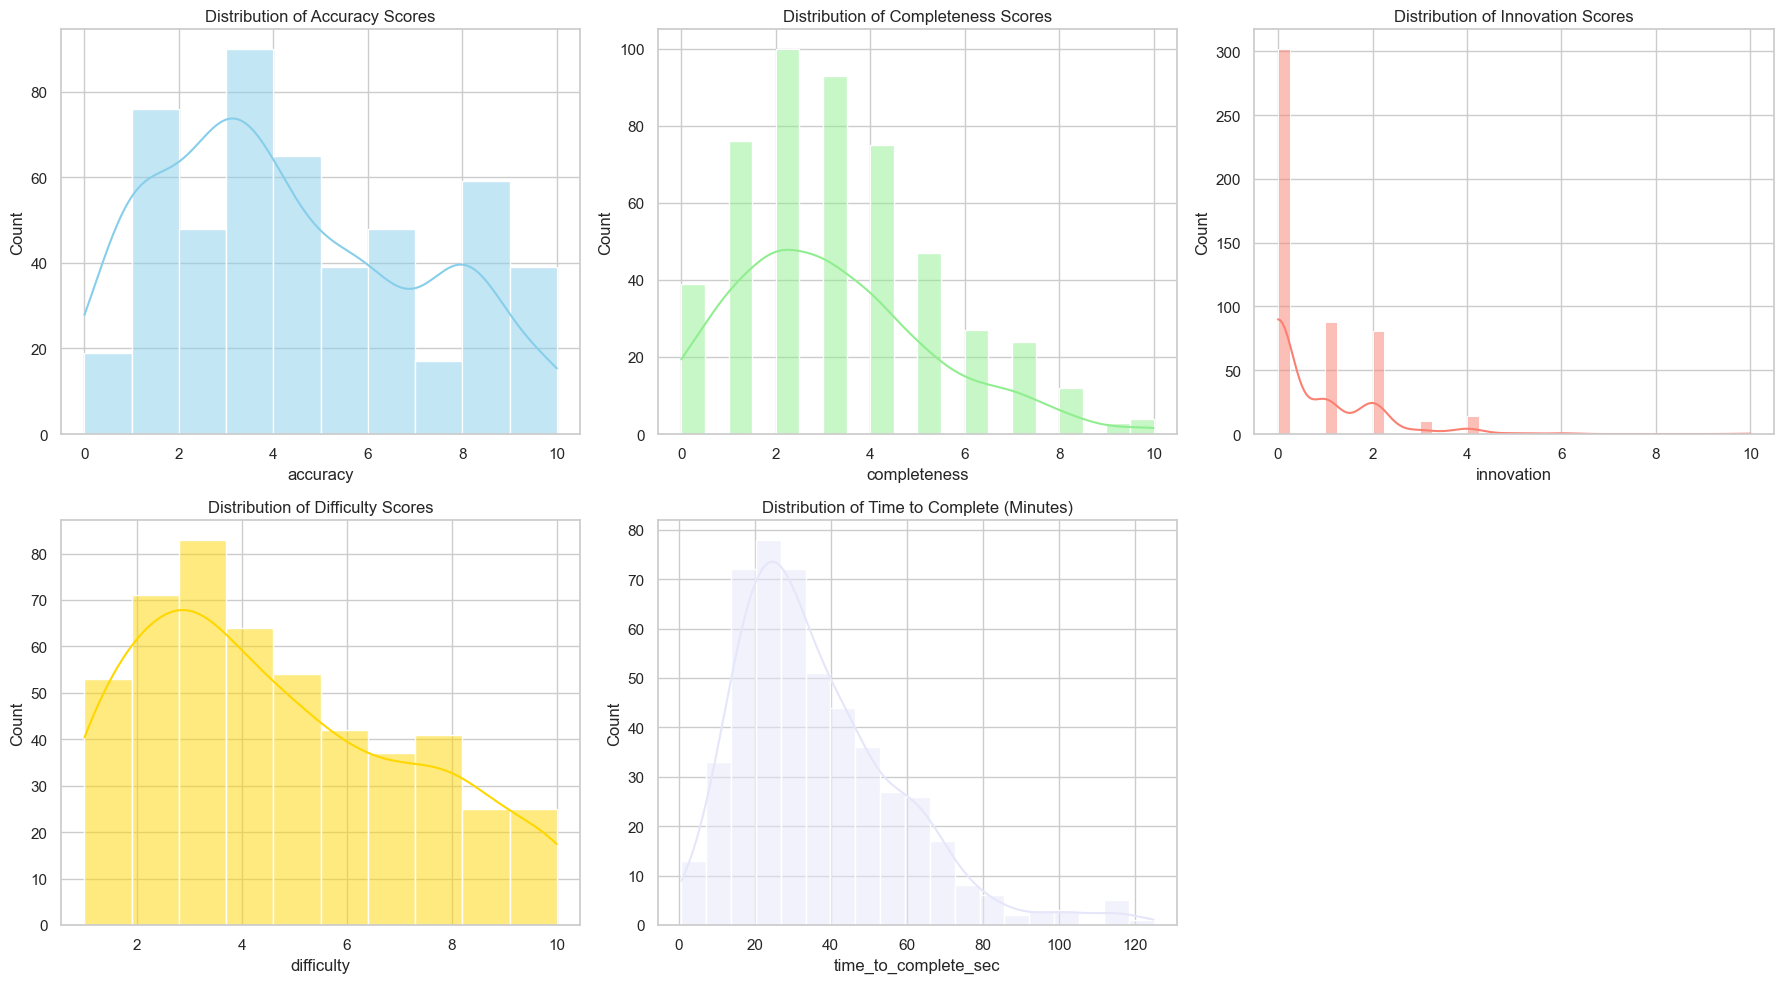

/var/folders/5z/74lhzxl93rd_qj1grzyw2tnw0000gn/T/ipykernel_41251/3018651926.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stage', y='time_to_complete_sec', data=df, palette='coolwarm')


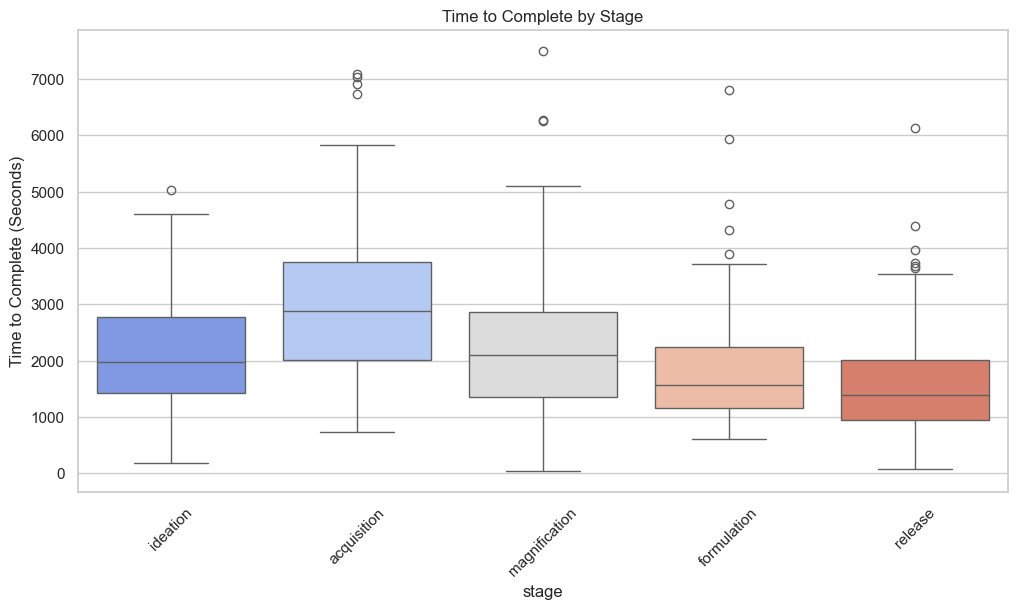

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting distributions of key numerical variables
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Accuracy
sns.histplot(df['accuracy'], kde=True, ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Distribution of Accuracy Scores')

# Completeness
sns.histplot(df['completeness'], kde=True, ax=ax[0, 1], color='lightgreen')
ax[0, 1].set_title('Distribution of Completeness Scores')

# Innovation
sns.histplot(df['innovation'], kde=True, ax=ax[0, 2], color='salmon')
ax[0, 2].set_title('Distribution of Innovation Scores')

# Difficulty
sns.histplot(df['difficulty'].dropna(), kde=True, ax=ax[1, 0], color='gold')
ax[1, 0].set_title('Distribution of Difficulty Scores')

# Time to Complete (in minutes for better readability)
sns.histplot(df['time_to_complete_sec']/60, kde=True, ax=ax[1, 1], color='lavender')
ax[1, 1].set_title('Distribution of Time to Complete (Minutes)')

# Removing the empty subplot
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Box plot to compare time to complete across different stages
plt.figure(figsize=(12, 6))
sns.boxplot(x='stage', y='time_to_complete_sec', data=df, palette='coolwarm')
plt.title('Time to Complete by Stage')
plt.ylabel('Time to Complete (Seconds)')
plt.xticks(rotation=45)
plt.show()
        

In this case, none of the histograms indicate that there is a normal distribution. In this case, we have 100 samples.\
A sample size of <30 is considered small. Given we have a multitude more, we should be able to use T-tests fairly robustly.